In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

##Load the Data

In [ ]:
df = pd.read_csv('/content/datacoll.csv')

In [ ]:
df.head()

,COMPANY,Date,Open,High,Low,Close,Adj Close,Volume
0,Nvidia Inc.,1/2/2013,0.31400,0.31825,0.31275,0.31800,0.293560,478836000
1,Nvidia Inc.,1/3/2013,0.31800,0.32175,0.31450,0.31825,0.293791,298888000
2,Nvidia Inc.,1/4/2013,0.31875,0.32975,0.31775,0.32875,0.303484,524968000
3,Nvidia Inc.,1/7/2013,0.32850,0.32950,0.31700,0.31925,0.294714,610732000
4,Nvidia Inc.,1/8/2013,0.32000,0.32100,0.31000,0.31225,0.288252,466424000


In [ ]:
df.isnull().sum()

COMPANY      0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,1.384000e+04
mean,72.710893,73.493698,71.914317,72.733568,71.156691,1.524164e+08
std,72.904590,73.671323,72.120740,72.926150,72.119382,2.006562e+08
min,0.299000,0.303500,0.297750,0.299500,0.276482,7.425600e+06
25%,21.610087,21.856644,21.348898,21.641284,21.173599,3.457388e+07
50%,46.297499,46.799999,45.892500,46.362501,42.788395,6.840976e+07
75%,107.895000,109.251249,106.333124,107.773373,105.332348,1.866109e+08
max,383.760010,384.299988,378.160004,382.700012,381.305817,3.692928e+09


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.set_index('Date', inplace=True)

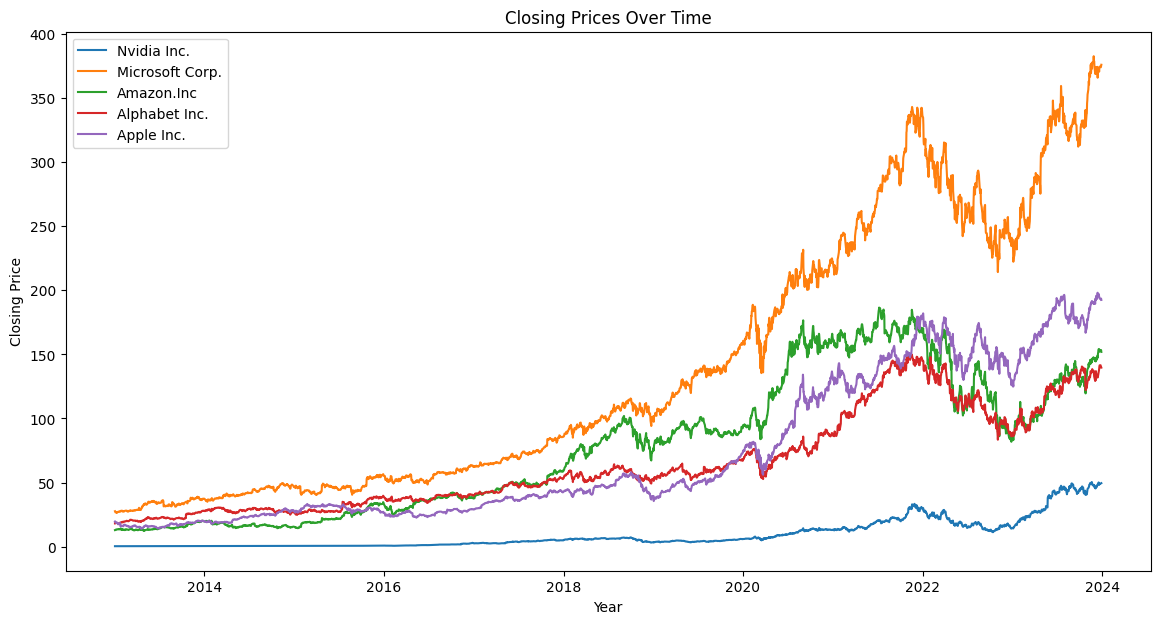

In [ ]:
# Plot the closing prices of each company
plt.figure(figsize=(14, 7))
for company in df['COMPANY'].unique():
    subset = df[df['COMPANY'] == company]
    plt.plot(subset.index, subset['Close'], label=company)

plt.title('Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

<Figure size 1400x700 with 0 Axes>

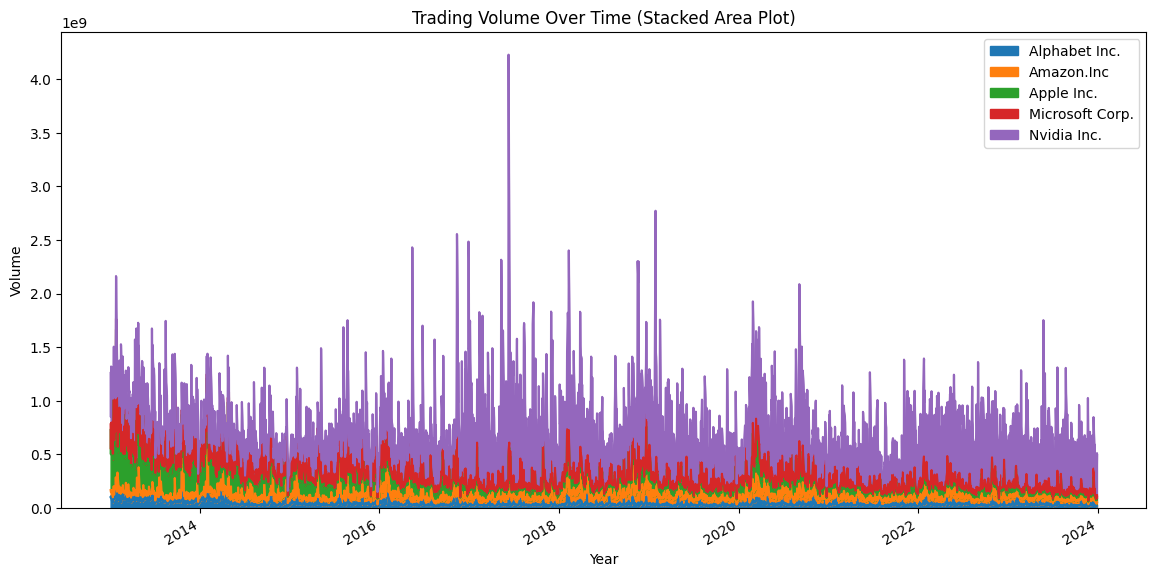

In [ ]:

# Stacked area plot for trading volume
plt.figure(figsize=(14, 7))
df_pivot = df.pivot_table(values='Volume', index=df.index, columns='COMPANY', aggfunc='sum')
df_pivot.plot(kind='area', stacked=True, figsize=(14, 7))

plt.title('Trading Volume Over Time (Stacked Area Plot)')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.legend()
plt.show()

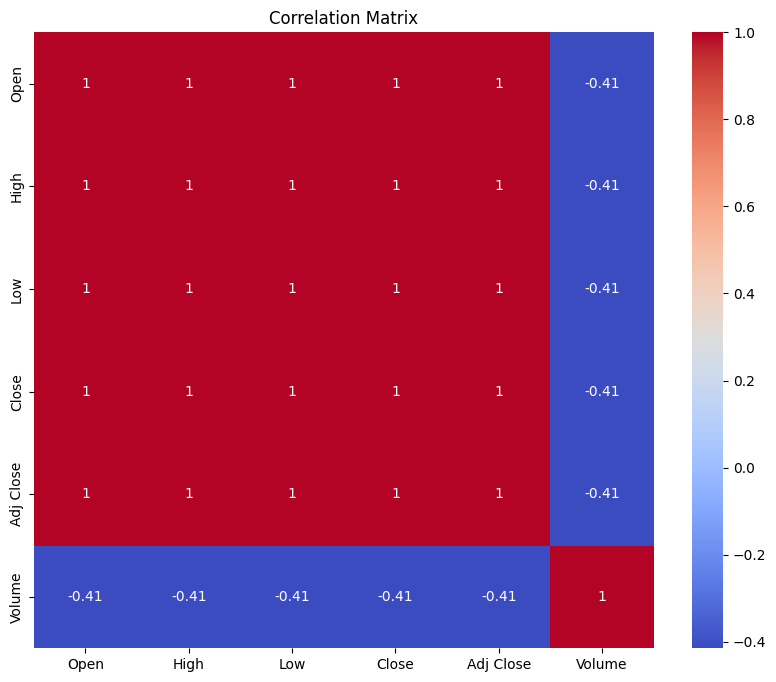

In [ ]:
# Calculate and plot the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])  # Select only numeric columns
correlation = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

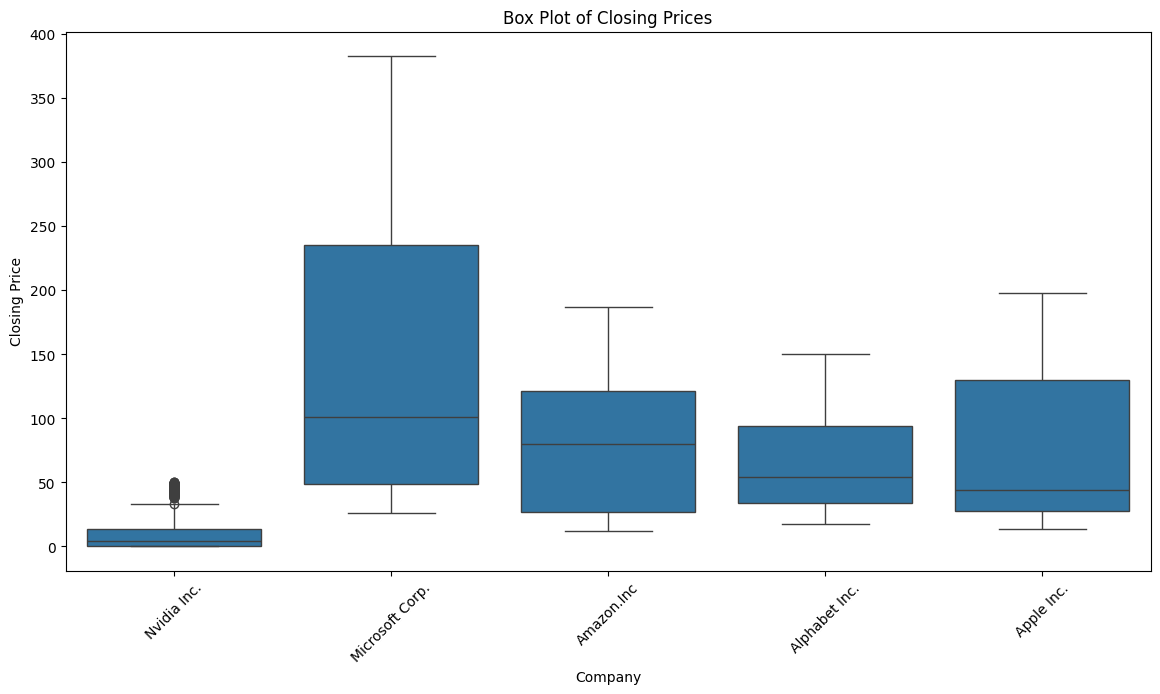

In [ ]:
 #Box plot for closing prices
plt.figure(figsize=(14, 7))
sns.boxplot(x='COMPANY', y='Close', data=df)
plt.title('Box Plot of Closing Prices')
plt.xlabel('Company')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.show()

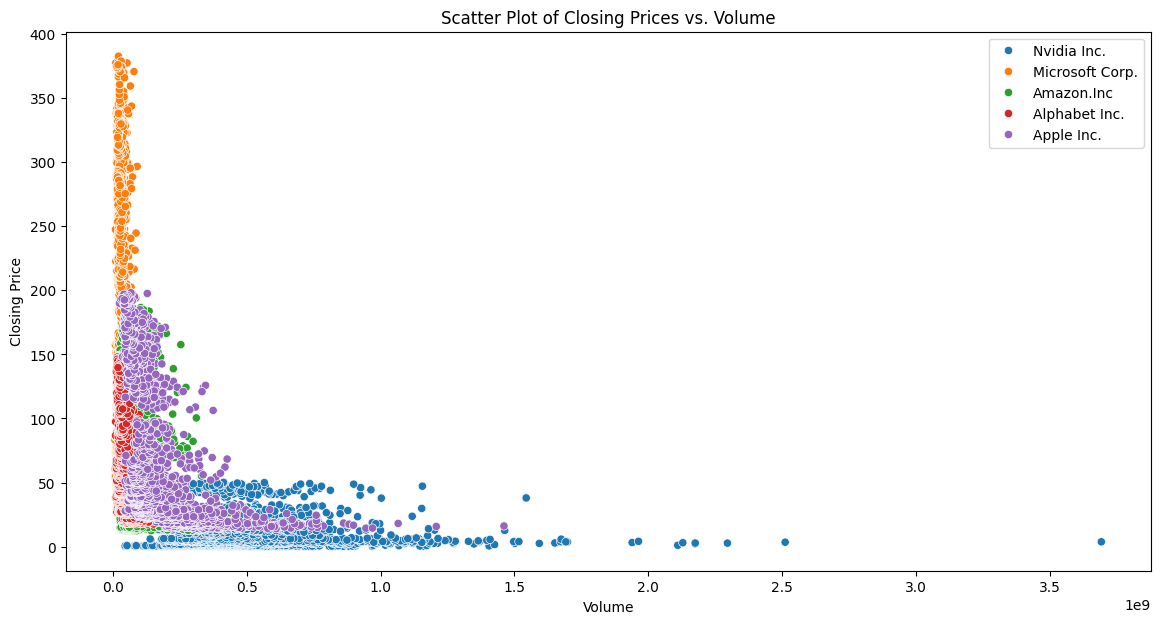

In [ ]:
# Scatter plot of closing prices vs volume
plt.figure(figsize=(14, 7))
sns.scatterplot(x='Volume', y='Close', hue='COMPANY', data=df)
plt.title('Scatter Plot of Closing Prices vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

##Data Prepration

In [ ]:
# Encode the 'COMPANY' column
df['COMPANY'] = df['COMPANY'].astype('category').cat.codes

In [ ]:
df.tail()

,COMPANY,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-12-22,2,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,2,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,2,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,2,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,2,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [ ]:
# Define features and target variable
X = df[['COMPANY', 'Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = df['Close']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)


Linear Regression
Mean Squared Error: 0.39455670446679
R-squared: 0.9999251357059464


In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)


Random Forest Regressor
Mean Squared Error: 0.2956109289047524
R-squared: 0.9999439099544972


In [ ]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor")
print("Mean Squared Error:", mse_gbr)
print("R-squared:", r2_gbr)


Gradient Boosting Regressor
Mean Squared Error: 0.955857769018525
R-squared: 0.9998186328700461


##Apply LSTM


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# Create sequences for LSTM
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, X_train.shape[2])))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
277/277 [==============================] - 10s 17ms/step - loss: 0.0017 - val_loss: 2.7325e-04
Epoch 2/20
277/277 [==============================] - 4s 14ms/step - loss: 5.1422e-04 - val_loss: 4.5972e-04
Epoch 3/20
277/277 [==============================] - 6s 23ms/step - loss: 4.8756e-04 - val_loss: 1.8670e-04
Epoch 4/20
277/277 [==============================] - 5s 19ms/step - loss: 4.4726e-04 - val_loss: 1.4706e-04
Epoch 5/20
277/277 [==============================] - 4s 13ms/step - loss: 3.3602e-04 - val_loss: 1.0999e-04
Epoch 6/20
277/277 [==============================] - 5s 19ms/step - loss: 3.2179e-04 - val_loss: 9.1203e-05
Epoch 7/20
277/277 [==============================] - 4s 13ms/step - loss: 2.8137e-04 - val_loss: 9.6496e-05
Epoch 8/20
277/277 [==============================] - 4s 13ms/step - loss: 2.2900e-04 - val_loss: 9.9969e-05
Epoch 9/20
277/277 [==============================] - 4s 15ms/step - loss: 2.1575e-04 - val_loss: 1.6167e-04
Epoch 10/20
277/277 [=

In [ ]:

# Predict and evaluate the model
y_pred_lstm = lstm_model.predict(X_test)
y_pred_lstm_rescaled = scaler_y.inverse_transform(y_pred_lstm)
y_test_rescaled = scaler_y.inverse_transform(y_test)

mse_lstm = mean_squared_error(y_test_rescaled, y_pred_lstm_rescaled)
r2_lstm = r2_score(y_test_rescaled, y_pred_lstm_rescaled)

print("\nLSTM Model")
print("Mean Squared Error:", mse_lstm)
print("R-squared:", r2_lstm)


87/87 [==============================] - 1s 4ms/step

LSTM Model
Mean Squared Error: 11.73950285500541
R-squared: 0.9977436523003224


##Neural Network Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the data (without sequences for the basic neural network)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
# Build the neural network model
nn_model = Sequential()
nn_model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(50, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [ ]:
# Train the model
nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
277/277 [==============================] - 2s 5ms/step - loss: 8.6154e-04 - val_loss: 1.0212e-05
Epoch 2/20
277/277 [==============================] - 1s 3ms/step - loss: 9.1905e-06 - val_loss: 8.0812e-06
Epoch 3/20
277/277 [==============================] - 1s 3ms/step - loss: 7.6159e-06 - val_loss: 6.7057e-06
Epoch 4/20
277/277 [==============================] - 1s 2ms/step - loss: 6.7725e-06 - val_loss: 6.6115e-06
Epoch 5/20
277/277 [==============================] - 1s 2ms/step - loss: 6.4172e-06 - val_loss: 5.2202e-06
Epoch 6/20
277/277 [==============================] - 1s 2ms/step - loss: 6.7139e-06 - val_loss: 7.8142e-06
Epoch 7/20
277/277 [==============================] - 1s 2ms/step - loss: 5.7563e-06 - val_loss: 7.9239e-06
Epoch 8/20
277/277 [==============================] - 1s 2ms/step - loss: 5.4905e-06 - val_loss: 5.0364e-06
Epoch 9/20
277/277 [==============================] - 1s 2ms/step - loss: 5.5162e-06 - val_loss: 4.2323e-06
Epoch 10/20
277/277 [=======

In [ ]:
# Predict and evaluate the model
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_rescaled = scaler_y.inverse_transform(y_pred_nn)
y_test_rescaled = scaler_y.inverse_transform(y_test)

mse_nn = mean_squared_error(y_test_rescaled, y_pred_nn_rescaled)
r2_nn = r2_score(y_test_rescaled, y_pred_nn_rescaled)

print("\nNeural Network Model")
print("Mean Squared Error:", mse_nn)
print("R-squared:", r2_nn)

87/87 [==============================] - 0s 2ms/step

Neural Network Model
Mean Squared Error: 0.36961026440814165
R-squared: 0.9999298691133451


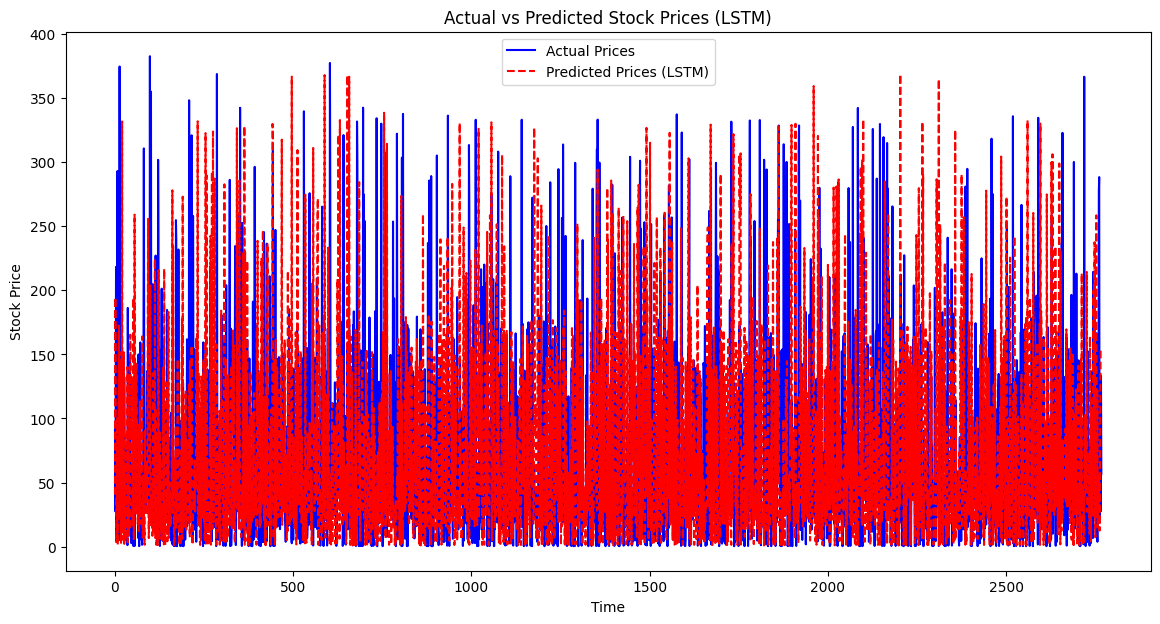

In [ ]:
# Plot actual vs predicted prices for LSTM
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, color='blue', label='Actual Prices')
plt.plot(y_pred_lstm_rescaled, color='red', linestyle='dashed', label='Predicted Prices (LSTM)')
plt.title('Actual vs Predicted Stock Prices (LSTM)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


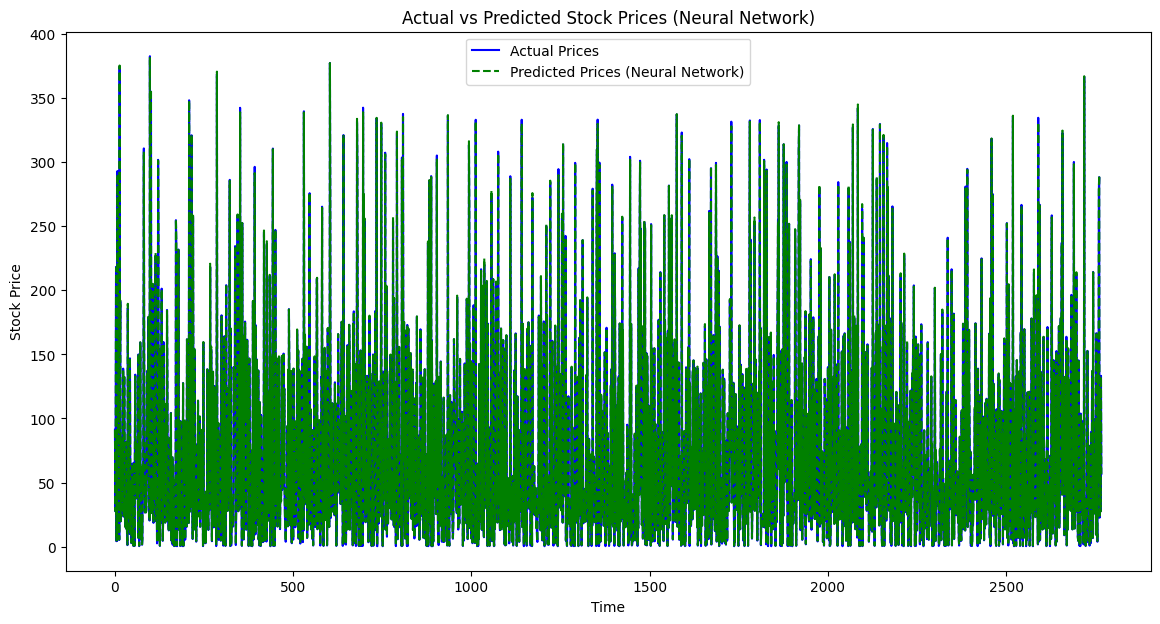

In [ ]:
# Plot actual vs predicted prices for Neural Network
plt.figure(figsize=(14, 7))
plt.plot(y_test_rescaled, color='blue', label='Actual Prices')
plt.plot(y_pred_nn_rescaled, color='green', linestyle='dashed', label='Predicted Prices (Neural Network)')
plt.title('Actual vs Predicted Stock Prices (Neural Network)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()